https://cyan91.tistory.com/14?category=230402


In [1]:
import os

In [2]:
import tarfile


In [3]:
from six.moves import urllib

In [22]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/blob/master/"

In [23]:
HOUSING_PATH = "datasets/housing"
HOUSING_PATH

'datasets/housing'

In [24]:
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
HOUSING_URL

'https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.tgz'

In [25]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [16]:
import pandas as pd


In [26]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)


In [27]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [28]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4BB36CC50>,
      dtype=object)

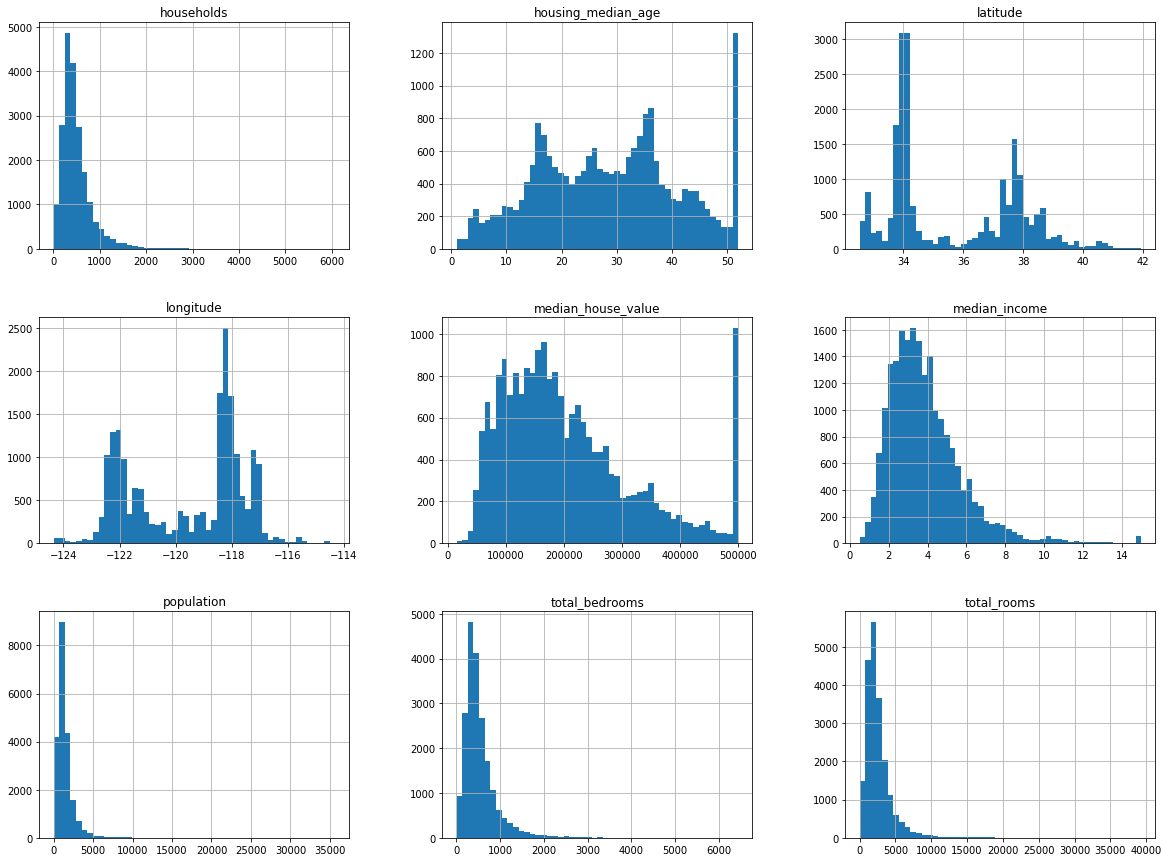

In [32]:
housing.hist(bins=50, figsize=(20,15))

In [33]:
plt.show()

In [34]:
import numpy as np

In [35]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [37]:
train_set, test_set = split_train_test(housing, 0.2)

In [39]:
print (len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [40]:
import hashlib

In [41]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [42]:
housing_with_id = housing.reset_index()

In [45]:
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [47]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_set, test_set = train_test_split(housing, test_size =0.2, random_state = 42)

In [50]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [55]:
housing['income_cat']= np.ceil(housing["median_income"]/1.5)

In [56]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  
0         6.0  
1         6.0  
2         5.0  
3         4.0  
4         3.0

In [57]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [58]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  
3         4.0  
4         3.0

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

In [60]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [61]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [62]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [63]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [64]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  
3         4.0  
4         3.0

In [65]:
housing = strat_train_set.copy()

In [66]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

In [67]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   
...           ...         ...            ...                 ...   
6563        573.0       210.0         4.9312            240200.0   
12053      1052.0       258.0         2.0682            113000.0   
13908      2098.0       765.0         3.2723             97800.0   
11159      1356.0       356.0         4.0625            225900.0   
15775      1269.0       639.0         3.5750            500001.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN  
...               ...  
6563           INLAND  
12053          INLAND  
13908          INLAND  
11159       <1H OCEAN  
15775        NEAR BAY  

[16512 rows x 10 columns]

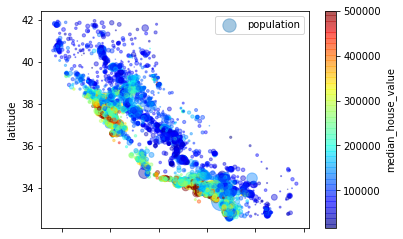

In [71]:
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=0.4,s=housing['population']/100, label ='population',
             c='median_house_value', cmap =plt.get_cmap('jet'),colorbar=True)

No handles with labels found to put in legend.


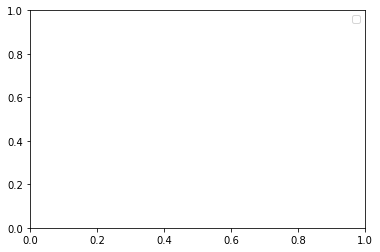

In [72]:
plt.legend()

In [73]:
corr_matrix = housing.corr()

In [74]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [75]:
from pandas.tools.plotting import scatter_matrix

ModuleNotFoundError: No module named 'pandas.tools'

In [76]:
import pandas as pd


In [85]:
from pandas.plotting import scatter_matrix

In [81]:
attributes=['median_house_value','median_income','total_rooms','housing_median_age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4BF1E4908>,
      dtype=object)

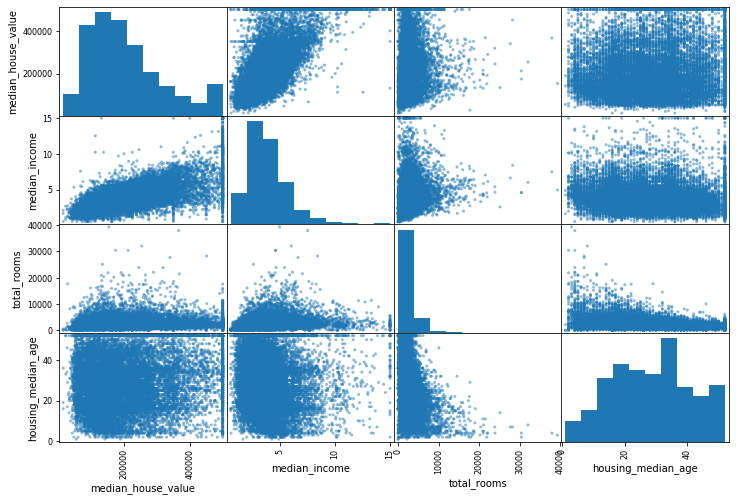

In [86]:
scatter_matrix(housing[attributes],figsize=(12,8))

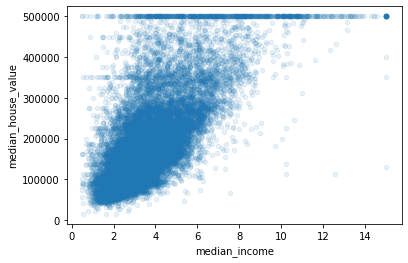

In [87]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [89]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']


In [90]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [91]:
housing['population_per_household'] = housing['population']/housing['households']

In [92]:
corr_matrix = housing.corr()

In [93]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [94]:
housing = strat_train_set.drop('median_house_value',axis=1)

In [95]:
housing_labels = strat_train_set['median_house_value'].copy()

In [96]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [97]:
housing.dropna(subset=['total_bedrooms'])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
...           ...         ...            ...             ...  
6563        573.0       210.0         4.9312          INLAND  
12053      1052.0       258.0         2.0682          INLAND  
13908      2098.0       765.0         3.2723          INLAND  
11159      1356.0       356.0         4.0625       <1H OCEAN  
15775      1269.0       639.0         3.5750        NEAR BAY  

[16354 rows x 9 columns]

In [98]:
median = housing['total_bedrooms'].median()

In [103]:
from sklearn.impute import SimpleImputer

In [107]:
imputer = SimpleImputer(strategy ='median')

In [105]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [108]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [109]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [110]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [111]:
X = imputer.transform(housing_num)

In [112]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [113]:
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -121.89     37.29                38.0       1568.0           351.0   
1        -121.93     37.05                14.0        679.0           108.0   
2        -117.20     32.77                31.0       1952.0           471.0   
3        -119.61     36.31                25.0       1847.0           371.0   
4        -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
16507    -118.13     34.20                46.0       1271.0           236.0   
16508    -117.56     33.88                40.0       1196.0           294.0   
16509    -116.40     34.09                 9.0       4855.0           872.0   
16510    -118.01     33.82                31.0       1960.0           380.0   
16511    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  
0           710.0       339.0         2.7042  
1           306.0       113.0         6.4214  
2           936.0       462.0         2.8621  
3          1460.0       353.0         1.8839  
4          4459.0      1463.0         3.0347  
...           ...         ...            ...  
16507       573.0       210.0         4.9312  
16508      1052.0       258.0         2.0682  
16509      2098.0       765.0         3.2723  
16510      1356.0       356.0         4.0625  
16511      1269.0       639.0         3.5750  

[16512 rows x 8 columns]

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
encoder = LabelEncoder()

In [116]:
housing_cat = housing['ocean_proximity']

In [117]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [118]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [119]:
len(housing_cat_encoded)

16512

In [120]:
print (encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
encoder = OneHotEncoder()

In [124]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot



<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [171]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(housing_cat.values.reshape(-1,1))

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [172]:
from sklearn.preprocessing import LabelBinarizer

In [173]:
encoder = LabelBinarizer()

In [127]:
housing_cat_1hot=encoder.fit_transform(housing_cat)

In [128]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [187]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # make sure no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, household_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
# transform np.array of original df
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [190]:
from sklearn.base import BaseEstimator, TransformerMixin

In [191]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

In [184]:
# Make a complete pipeline by joining the two pipelines using FeatureUnion
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(housing)

housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

In [192]:
# linear regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
some_data = housing.iloc[:5]

In [194]:
some_labels = housing_labels.iloc[:5]

In [195]:
some_data_prepared = full_pipeline.transform(some_data)

In [196]:
print (lin_reg.predict(some_data_prepared))

[211881.21811279 321219.24211009 210877.63065012  62198.25451316
 194847.8414579 ]


In [198]:
print (list(some_labels))

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [200]:
from sklearn.metrics import mean_squared_error

In [201]:
housing_predictions =lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

In [202]:
lin_rmse

68911.49637588045

In [203]:
from sklearn.tree import DecisionTreeRegressor

In [204]:
tree_reg = DecisionTreeRegressor()

In [205]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [207]:
housing_predictions = tree_reg.predict(housing_prepared)

In [208]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [209]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ='neg_mean_squared_error', cv=10)

In [216]:
rmse_scores = np.sqrt(-scores)

In [217]:
scores

array([-5.16240716e+09, -4.67632504e+09, -5.14306546e+09, -5.09603687e+09,
       -4.67520552e+09, -5.69342441e+09, -5.09187123e+09, -5.09861032e+09,
       -6.01220691e+09, -4.79700933e+09])

In [218]:
scores.mean()

-5144616224.002548

In [219]:
from sklearn.ensemble import RandomForestRegressor


In [220]:
forest_reg = RandomForestRegressor()

In [221]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [222]:
housing_predictions = forest_reg.predict(housing_prepared)

In [223]:
forest_rme = mean_squared_error(housing_labels, housing_predictions)

In [224]:
forest_rmse = np.sqrt(forest_rme)

In [225]:
forest_rmse

18856.917248699407